In [26]:
import pandas as pd

df = pd.read_csv("food_waste_stuff.csv")
df.head()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
0,126,82,3109153,16,594982,28,1051783,4
1,127,83,238492,16,45058,28,79651,8
2,135,91,3918529,16,673360,28,1190335,12
3,123,84,6497,13,988,26,1971,20
4,144,100,3169523,16,497755,28,879908,24


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [36]:
y = df['combined figures (kg/capita/year)']  # Target variable
X = df.drop(['combined figures (kg/capita/year)', 'M49 code'], axis=1) # Features


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [39]:
svr_model = SVR(kernel='linear', C=1.0)  # You can experiment with different kernels and parameters
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [40]:
y_pred = svr_model.predict(X_test)


In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.00


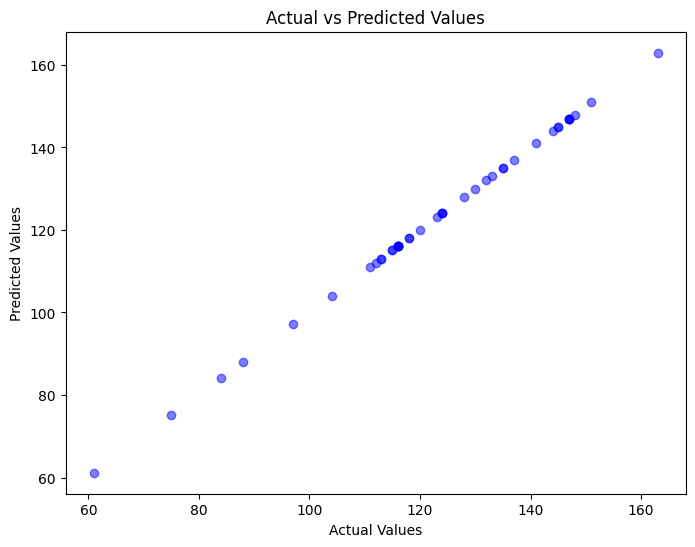

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()